# data load

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# data load
df = pd.read_excel('dataset_top100(3).xlsx')
df

,Released,Track_Name,Artist_Names,Entertainment,Member,Gender,Genre,Record_Kind,Country,Producing,w1,w2,w3,w4,w5,w6,w7,w8
0,2021-01-27,Celebrity,아이유,big,solo,female,dance,single,0.0,1,1,1,1,1,1,1,4,5
1,2020-04-27,살짝 설렜어,오마이걸,small,idol,female,dance,mini,0.0,1,1,2,1,3,3,3,4,3
2,2020-02-06,뛰어들게 (DIve),iKON,big,idol,male,dance,mini,0.0,1,15,45,56,71,100,100,100,100
3,2020-01-07,Good Guy,SF9,big,idol,male,dance,regular,0.0,1,36,72,100,100,100,100,100,100
4,2020-03-09,Howling,VICTON (빅톤),small,idol,male,dance,mini,0.0,1,45,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-12-28,불면,김필,small,solo,male,rock,single,0.0,1,100,100,100,100,100,100,100,100
96,2020-07-23,Dreaming,규현(슈퍼주니어),big,idol_solo,male,rock,single,0.0,0,100,100,100,100,100,100,100,100
97,2021-03-03,어떤날은,김필,small,solo,male,rock,single,0.0,1,100,100,100,100,100,100,100,100
98,2020-02-18,scream,드림캐쳐,small,idol,female,rock,regular,0.0,0,63,52,67,66,73,80,92,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Released       100 non-null    datetime64[ns]
 1   Track_Name     100 non-null    object        
 2   Artist_Names   100 non-null    object        
 3   Entertainment  100 non-null    object        
 4   Member         100 non-null    object        
 5   Gender         100 non-null    object        
 6   Genre          100 non-null    object        
 7   Record_Kind    100 non-null    object        
 8   Country        100 non-null    float64       
 9   Producing      100 non-null    int64         
 10  w1             100 non-null    int64         
 11  w2             100 non-null    int64         
 12  w3             100 non-null    int64         
 13  w4             100 non-null    int64         
 14  w5             100 non-null    int64         
 15  w6             100 non-n

In [4]:
# 변수 검토
print('<기획사 크기>\n',df.Entertainment.value_counts())
print('<멤버 구성>\n',df.Member.value_counts())
print('<성별>\n',df.Gender.value_counts())
print('<앨범 종류>\n',df.Record_Kind.value_counts())
print('<외국인 멤버 비중>\n',df.Country.value_counts())
print('<앨범 참여 유무>\n',df.Producing.value_counts())

<기획사 크기>
 small    67
big      33
Name: Entertainment, dtype: int64
<멤버 구성>
 solo         44
idol         34
idol_solo    13
group         9
Name: Member, dtype: int64
<성별>
 male      62
female    36
mixed      2
Name: Gender, dtype: int64
<앨범 종류>
 single     51
mini       31
regular    18
Name: Record_Kind, dtype: int64
<외국인 멤버 비중>
 0.000    86
0.250     4
0.500     2
0.180     1
0.625     1
0.440     1
0.230     1
0.430     1
0.300     1
0.570     1
1.000     1
Name: Country, dtype: int64
<앨범 참여 유무>
 1    68
0    32
Name: Producing, dtype: int64


# 클러스터링

In [5]:
# 순위 데이터
df_rank = df[['w1','w2','w3','w4','w5','w6','w7','w8']] 
df_rank

,w1,w2,w3,w4,w5,w6,w7,w8
0,1,1,1,1,1,1,4,5
1,1,2,1,3,3,3,4,3
2,15,45,56,71,100,100,100,100
3,36,72,100,100,100,100,100,100
4,45,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...
95,100,100,100,100,100,100,100,100
96,100,100,100,100,100,100,100,100
97,100,100,100,100,100,100,100,100
98,63,52,67,66,73,80,92,100


In [6]:
#clustering

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0).fit(df_rank)
print('lable')
print(kmeans.labels_)
print('center')
print(kmeans.cluster_centers_)
df['target']=kmeans.labels_ #df에 cluster 나눈 결과 행 추가

lable
[1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
center
[[65.19354839 66.90322581 74.67741935 81.67741935 87.11290323 90.17741935
  91.4516129  93.19354839]
 [19.39473684 11.26315789 12.68421053 14.78947368 17.13157895 19.84210526
  23.         26.34210526]]


In [7]:
# 몇 개로 나눠졌는지 확인
df['target'].value_counts()

0    62
1    38
Name: target, dtype: int64

# 클러스터링 결과 순위 평균 + 교수님 피드백

In [9]:
df_rank['cluster'] = kmeans.labels_

<ipython-input-9-4e49d43d80dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank['cluster'] = kmeans.labels_


In [51]:
df_rank

,w1,w2,w3,w4,w5,w6,w7,w8,cluster
0,1,1,1,1,1,1,4,5,1
1,1,2,1,3,3,3,4,3,1
2,15,45,56,71,100,100,100,100,0
3,36,72,100,100,100,100,100,100,0
4,45,100,100,100,100,100,100,100,0
...,...,...,...,...,...,...,...,...,...
95,100,100,100,100,100,100,100,100,0
96,100,100,100,100,100,100,100,100,0
97,100,100,100,100,100,100,100,100,0
98,63,52,67,66,73,80,92,100,0


In [11]:
df_rank.cluster.value_counts()

0    62
1    38
Name: cluster, dtype: int64

In [42]:
cl0 = df_rank.loc[df_rank['cluster'] == 0 ]
cl1 = df_rank.loc[df_rank['cluster'] == 1 ]

In [43]:
cl0_mean = list(cl0.mean(axis=0))
cl1_mean = list(cl1.mean(axis=0))

In [45]:
del cl0_mean[8]
del cl1_mean[8]

In [47]:
print(cl0_mean)
print(cl1_mean)
len(cl0_mean)

[65.19354838709677, 66.90322580645162, 74.6774193548387, 81.6774193548387, 87.11290322580645, 90.1774193548387, 91.45161290322581, 93.19354838709677]
[19.394736842105264, 11.263157894736842, 12.68421052631579, 14.789473684210526, 17.13157894736842, 19.842105263157894, 23.0, 26.342105263157894]


8

In [82]:
print(np.mean(cl0_mean))
print(np.mean(cl1_mean))

81.29838709677418
18.05592105263158


In [38]:
cl0_mean = list(cl0.mean(axis=0))

In [79]:
np.mean(cl0_mean)

81.29838709677418

In [80]:
np.mean(cl1_mean)

18.05592105263158

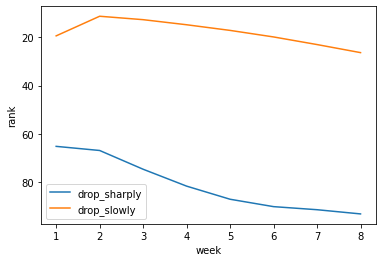

In [48]:
x_values = [1, 2, 3, 4, 5, 6, 7, 8]

y_values_11 = cl0_mean
y_values_22 = cl1_mean

plt.plot(x_values, y_values_11)
plt.plot(x_values, y_values_22)
plt.gca().invert_yaxis()
plt.xlabel('week')
plt.ylabel('rank')
plt.legend(['drop_sharply','drop_slowly'])
plt.show()

In [52]:
clustering_result = df.groupby(['Entertainment','Member','Gender','Genre','Record_Kind','Country','Producing'])['target'].count()

In [53]:
clustering_result

Entertainment  Member  Gender  Genre   Record_Kind  Country  Producing
big            group   mixed   rock    mini         0.00     1            1
                                       single       0.00     1            1
               idol    female  dance   mini         0.25     0            1
                                                    0.50     1            1
                                       regular      0.25     1            1
                                                                         ..
small          solo    male    hiphop  mini         0.00     1            3
                                       regular      0.00     1            1
                                       single       0.00     1            7
                               rock    mini         0.00     1            1
                                       single       0.00     1            4
Name: target, Length: 64, dtype: int64

In [54]:
df.to_csv('클러스터링 결과.csv',encoding='utf-8-sig')

### 클러스터링 시각화

In [55]:
cluster0 = kmeans.cluster_centers_[0].tolist()
cluster1 = kmeans.cluster_centers_[1].tolist()

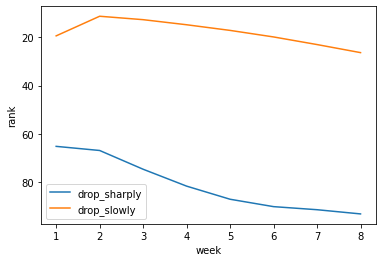

In [56]:
x_values = [1, 2, 3, 4, 5, 6, 7, 8]

y_values_1 = cluster0
y_values_2 = cluster1

plt.plot(x_values, y_values_1)
plt.plot(x_values, y_values_2)
plt.gca().invert_yaxis()
plt.xlabel('week')
plt.ylabel('rank')
plt.legend(['drop_sharply','drop_slowly'])
plt.show()

clustering 결과를 보면

- cluster1번 center 상위권 : 앨범 발매 후 다음 주 순위가 높아진 후 다시 내려가긴 하나 상위권 차트 유지

- cluster0번 center 하위권 : 2주까지 소폭 하락한 후 이후 급격 하락하며 8주 후에는 100위 차트 밖으로 넘어감

# classification

In [57]:
# df에서 변수+target만 dataframe으로 저장

df_X = df[['Entertainment','Member','Gender','Genre','Record_Kind','Country','Producing','target']]
df_y = df['target']

In [58]:
# 문자열을 레이블 인코딩

from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Entertainment','Member','Gender','Genre','Record_Kind','Country','Producing','target']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

df_X = encode_features(df_X)
df_X

<ipython-input-58-09e2a658d4d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDF[feature] = le.transform(dataDF[feature])


,Entertainment,Member,Gender,Genre,Record_Kind,Country,Producing,target
0,0,3,0,1,2,0,1,1
1,1,1,0,1,0,0,1,1
2,0,1,1,1,0,0,1,0
3,0,1,1,1,1,0,1,0
4,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
95,1,3,1,3,2,0,1,0
96,0,2,1,3,2,0,0,0
97,1,3,1,3,2,0,1,0
98,1,1,0,3,1,0,0,0


### classification 생성

- decision tree가 accuracy는 그나마 높게 나옴

In [59]:
df_X = df_X.drop('target',axis=1)

In [60]:
df_X

,Entertainment,Member,Gender,Genre,Record_Kind,Country,Producing
0,0,3,0,1,2,0,1
1,1,1,0,1,0,0,1
2,0,1,1,1,0,0,1
3,0,1,1,1,1,0,1
4,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...
95,1,3,1,3,2,0,1
96,0,2,1,3,2,0,0
97,1,3,1,3,2,0,1
98,1,1,0,3,1,0,0


In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.2, random_state=11)

In [889]:
# classifier 객체 생성

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=1000)

In [890]:
# decision tree 학습과 예측
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)

print('Decision Tree Classifier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))


# random forest 학습과 예측

rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)

print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,rf_pred)))


# logistic regression 학습과 예측

lr_clf.fit(X_train,y_train)
lr_pred = rf_clf.predict(X_test)

print('LogisicRegressionClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

Decision Tree Classifier 정확도:0.8000
RandomForestClassifier 정확도:0.7000
LogisicRegressionClassifier 정확도:0.7000


In [891]:
# 모형 성능 평가 confusion matrix

# Decision Tree Classifier

from sklearn import metrics

dt_matrix = metrics.confusion_matrix(y_test,dt_pred)
print(dt_matrix)

dt_report = metrics.classification_report(y_test,dt_pred)
print(dt_report)

[[10  0]
 [ 4  6]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.60      0.75        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80      0.79        20



In [892]:
# RandomForestClassifier

rf_matrix = metrics.confusion_matrix(y_test,rf_pred)
print(rf_matrix)

rf_report = metrics.classification_report(y_test,rf_pred)
print(rf_report)

[[9 1]
 [5 5]]
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.83      0.50      0.62        10

    accuracy                           0.70        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.74      0.70      0.69        20



In [893]:
# LogisicRegressionClassifier

lr_matrix = metrics.confusion_matrix(y_test,lr_pred)
print(lr_matrix)

lr_report = metrics.classification_report(y_test,lr_pred)
print(lr_report)

[[9 1]
 [5 5]]
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.83      0.50      0.62        10

    accuracy                           0.70        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.74      0.70      0.69        20



In [894]:
# decision tree 교차 검증

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, df_X, df_y, cv=20)
for iter_count,accuracy in enumerate(scores):
    print('교차검증{0} 정확도: {1:.4f}'.format(iter_count,accuracy))
    
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

교차검증0 정확도: 0.4000
교차검증1 정확도: 0.4000
교차검증2 정확도: 0.2000
교차검증3 정확도: 0.8000
교차검증4 정확도: 0.8000
교차검증5 정확도: 0.6000
교차검증6 정확도: 0.8000
교차검증7 정확도: 0.4000
교차검증8 정확도: 0.2000
교차검증9 정확도: 0.2000
교차검증10 정확도: 0.4000
교차검증11 정확도: 0.8000
교차검증12 정확도: 0.6000
교차검증13 정확도: 1.0000
교차검증14 정확도: 0.8000
교차검증15 정확도: 1.0000
교차검증16 정확도: 0.8000
교차검증17 정확도: 0.8000
교차검증18 정확도: 0.8000
교차검증19 정확도: 0.8000
평균 정확도:0.6300


In [895]:
# random forest 교차 검증

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf, df_X, df_y, cv=20)
for iter_count,accuracy in enumerate(scores):
    print('교차검증{0} 정확도: {1:.4f}'.format(iter_count,accuracy))
    
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

교차검증0 정확도: 0.6000
교차검증1 정확도: 0.6000
교차검증2 정확도: 0.2000
교차검증3 정확도: 0.8000
교차검증4 정확도: 0.8000
교차검증5 정확도: 0.4000
교차검증6 정확도: 0.6000
교차검증7 정확도: 0.8000
교차검증8 정확도: 0.2000
교차검증9 정확도: 0.2000
교차검증10 정확도: 0.2000
교차검증11 정확도: 0.8000
교차검증12 정확도: 0.6000
교차검증13 정확도: 1.0000
교차검증14 정확도: 0.8000
교차검증15 정확도: 1.0000
교차검증16 정확도: 0.8000
교차검증17 정확도: 1.0000
교차검증18 정확도: 0.6000
교차검증19 정확도: 0.8000
평균 정확도:0.6400


In [896]:
# logistic regression 교차 검증

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, df_X, df_y, cv=20)
for iter_count,accuracy in enumerate(scores):
    print('교차검증{0} 정확도: {1:.4f}'.format(iter_count,accuracy))
    
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

교차검증0 정확도: 0.6000
교차검증1 정확도: 0.6000
교차검증2 정확도: 0.4000
교차검증3 정확도: 0.6000
교차검증4 정확도: 0.8000
교차검증5 정확도: 0.8000
교차검증6 정확도: 0.8000
교차검증7 정확도: 0.6000
교차검증8 정확도: 0.6000
교차검증9 정확도: 0.4000
교차검증10 정확도: 0.6000
교차검증11 정확도: 0.6000
교차검증12 정확도: 0.6000
교차검증13 정확도: 0.8000
교차검증14 정확도: 0.4000
교차검증15 정확도: 0.6000
교차검증16 정확도: 0.8000
교차검증17 정확도: 1.0000
교차검증18 정확도: 1.0000
교차검증19 정확도: 0.8000
평균 정확도:0.6700


# feature_importance

<AxesSubplot:>

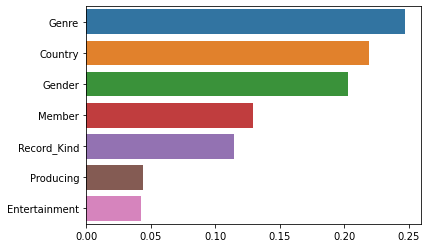

In [897]:
import seaborn as sns
%matplotlib inline

# decision tree 

feature_series = pd.Series(data=dt_clf.feature_importances_, index=df_X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

<AxesSubplot:>

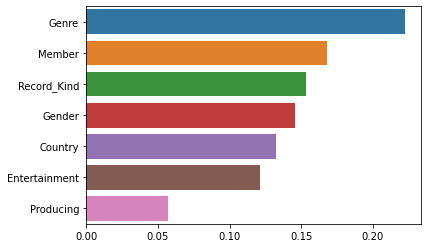

In [898]:
# random forest

feature_series = pd.Series(data=rf_clf.feature_importances_, index=df_X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [899]:
# logistic regressions는 feature importance 없음

# DT 시각화

- 웨카 소프트웨어로 진행

# clusting-2(3개로 분류) -> 결과가 2개 분류보다 안좋음

In [900]:
#clustering

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(df_rank)
print('lable')
print(kmeans.labels_)
print('center')
print(kmeans.cluster_centers_)
df['cluster3']=kmeans.labels_

lable
[1 1 0 2 2 2 1 1 2 2 2 1 1 0 0 1 1 2 1 1 1 1 0 1 1 1 0 0 0 0 2 0 2 2 1 0 2
 0 0 0 1 1 0 1 2 0 1 0 2 0 2 1 1 0 1 1 1 0 0 2 1 0 1 0 1 0 1 0 2 0 1 2 0 0
 2 0 1 0 2 2 2 0 0 2 2 2 2 2 1 0 2 0 2 2 2 2 2 2 0 2]
center
[[48.58823529 42.41176471 49.47058824 58.61764706 68.5        74.5
  77.52941176 81.55882353]
 [15.84375     8.09375     8.125      10.375      11.75       14.0625
  17.09375    19.8125    ]
 [77.05882353 84.55882353 93.23529412 97.08823529 98.44117647 98.88235294
  98.85294118 99.17647059]]


In [901]:
cluster3_0 = kmeans.cluster_centers_[0].tolist()
cluster3_1 = kmeans.cluster_centers_[1].tolist()
cluster3_2 = kmeans.cluster_centers_[2].tolist()


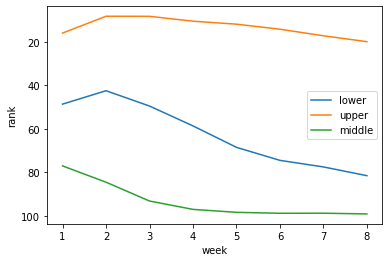

In [902]:
x_values = [1, 2, 3, 4, 5, 6, 7, 8]

y_values_31 = cluster3_0
y_values_32 = cluster3_1
y_values_33 = cluster3_2

plt.plot(x_values, y_values_31)
plt.plot(x_values, y_values_32)
plt.plot(x_values, y_values_33)
plt.gca().invert_yaxis()
plt.xlabel('week')
plt.ylabel('rank')
plt.legend(['lower','upper','middle'])
plt.show()

In [67]:
df_y2 = df['cluster3']

X_train,X_test,y_train,y_test = train_test_split(df_X,df_y2,test_size=0.2, random_state=11)

KeyError: 'cluster3'

In [904]:
# decision tree 학습과 예측
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)

print('Decision Tree Classifier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))


# random forest 학습과 예측

rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)

print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,rf_pred)))


# logistic regression 학습과 예측

lr_clf.fit(X_train,y_train)
lr_pred = rf_clf.predict(X_test)

print('LogisicRegressionClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

Decision Tree Classifier 정확도:0.5000
RandomForestClassifier 정확도:0.6000
LogisicRegressionClassifier 정확도:0.6000


# 로짓 분석 + 교수님 피드백

In [70]:
import statsmodels.api as sm

In [62]:
df_X

,Entertainment,Member,Gender,Genre,Record_Kind,Country,Producing
0,0,3,0,1,2,0,1
1,1,1,0,1,0,0,1
2,0,1,1,1,0,0,1
3,0,1,1,1,1,0,1
4,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...
95,1,3,1,3,2,0,1
96,0,2,1,3,2,0,0
97,1,3,1,3,2,0,1
98,1,1,0,3,1,0,0


In [63]:
df_y

0     1
1     1
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: target, Length: 100, dtype: int32

In [71]:
logit = sm.Logit(df_y, df_X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.549332
         Iterations 6


In [72]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.173     
Dependent Variable: target           AIC:              123.8664  
Date:               2021-06-14 17:00 BIC:              142.1026  
No. Observations:   100              Log-Likelihood:   -54.933   
Df Model:           6                LL-Null:          -66.406   
Df Residuals:       93               LLR p-value:      0.00081462
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Entertainment     -0.8637   0.5359 -1.6115 0.1071 -1.9141  0.1868
Member            -0.1505   0.2431 -0.6190 0.5359 -0.6269  0.3260
Gender            -1.2262   0.4836 -2.5355 0.0112 -2.1740 -0.2783
Genre             -0.3591   0.2188 -1.6415 0.1007 -0.7879  0.0697
Record_Kind        0.5546   0.2796  1.9837 0.0473  0.0066  1.1025
Country            0.3887   0.1545  2.5152 0.0119  0.0858  0.6915
Producing          1.0259   0.5964  1.7201 0.0854 -0.1430  2.1948
=================================================================

"""